In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-scoring/sample_submission.csv
/kaggle/input/sf-scoring/train.csv
/kaggle/input/sf-scoring/test.csv


In [2]:
#  фиксируемся для возможности воспроизведения
RANDOM_SEED = 42
!pip freeze > requirements.txt

In [3]:
DATA_DIR = '/kaggle/input/sf-scoring/'
df_train = pd.read_csv(DATA_DIR +'/train.csv')
df_test = pd.read_csv(DATA_DIR +'/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [4]:
sample_submission.shape

(36349, 2)

In [5]:
df_test.shape

(36349, 18)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

**отметим, что:**
1) в признаке education есть пропуски;

2) надо будет преоброзовать в числа признаки: app_date, education, sex, car, car_type и foreign_passport 

In [7]:
df_train.head(20)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
5,41415,18FEB2014,SCH,M,27,Y,N,0,1,-2.032257,0,50,1,1,15000,2,3,N,0
6,28436,04FEB2014,SCH,M,39,N,N,0,0,-2.225004,0,60,1,2,28000,1,1,N,0
7,68769,17MAR2014,SCH,F,39,N,N,0,0,-1.522739,1,50,2,3,45000,3,3,N,0
8,38424,14FEB2014,SCH,F,50,Y,N,1,0,-1.676061,0,50,1,1,30000,1,4,N,0
9,4496,10JAN2014,UGR,F,54,N,N,0,0,-2.695176,1,50,2,3,24000,1,3,N,0


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [9]:
sample_submission.head(5)

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  36349 non-null  int64
 1   default    36349 non-null  int64
dtypes: int64(2)
memory usage: 568.1 KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [13]:
data.nunique(dropna=False)

client_id           110148
app_date               120
education                6
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
sample                   2
default                  2
dtype: int64

In [14]:
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income']
cat_cols = ['education', 'first_time', 'sna', 'work_address', 'home_address', 'region_rating']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

<AxesSubplot:>

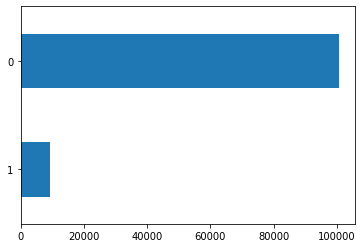

In [15]:
data['default'].value_counts(ascending=True).plot(kind='barh')

# **Далее выполним необходимые действия с данными**

# начнём с признака education:

In [16]:
#  посмотрим на значения признака:
print('Значения и их количество:\n', data['education'].value_counts())  
NaN_count = data['education'].isna().sum()
print('Пустых значений:', NaN_count)
print('Доля пустых значений:', round(NaN_count / len(data), 3))

Значения и их количество:
 SCH    57998
GRD    34768
UGR    14748
PGR     1865
ACD      291
Name: education, dtype: int64
Пустых значений: 478
Доля пустых значений: 0.004


<AxesSubplot:>

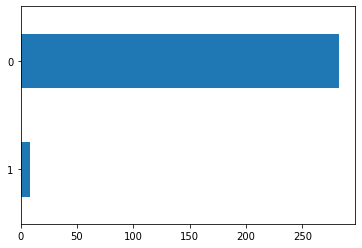

In [17]:
#  мало значений PGR и ACD. Посмотрим на примере ACD возможен
#  ли вообще дефолт для таких клиентов
data[data.education == 'ACD']['default'].value_counts(ascending=True).plot(kind='barh')

In [18]:
#  дефолт возможен, хотя и реже. То есть использование таких значений при заполнении
#  пропусков не должно сильно повлиять на результат.
#  пропуски заполняются, исходя из вероятности появления значений:

import warnings
import random
warnings.simplefilter('ignore')

def fill_na(df: pd.DataFrame, column: object) -> pd.Series:
    prob = df[column].value_counts(normalize=True)
    ind = df[df[column].isna()==True].index
    fill_list = pd.Series(random.choices(prob.index, prob, k=df[column].isna().sum()))
    fill_list.index = ind
    return df[column].fillna(fill_list)

for col in data.columns:
    data[col] = fill_na(data, col)

In [19]:
#   создание dummy-переменных на основе признака education
data = pd.get_dummies(data, columns=['education'], dummy_na=False)

# Теперь поработаем над остальными признаками

In [20]:
#  удалим следующие столбцы:
#  client_id - потому что не влияет на результат;
#  app_date - потому что не придумал как его использовать;
data.drop(['client_id','app_date'], axis = 1, inplace=True)

In [21]:
#  преобразуем данные у категориальных признаков

#  бинарные просто приведём к числовому виду:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for column in bin_cols:
    data[column] = le.fit_transform(data[column])
    
#  в остальных случаях создаём новые признаки, соответствующие значениям старых:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

columns = ['first_time', 'sna', 'work_address', 'home_address', 'region_rating']
col_names = ['first_time_1', 'first_time_2', 'first_time_3', 'first_time_4',
            'sna_1', 'sna_2', 'sna_3', 'sna_4',
            'work_address_1', 'work_address_2', 'work_address_3',
            'home_address_1', 'home_address_2', 'home_address_3',
            'region_rating_20', 'region_rating_30', 'region_rating_40',
            'region_rating_50', 'region_rating_60', 'region_rating_70',
            'region_rating_80']

X_cat = one_hot_encoder.fit_transform(data[columns].values)
X_cat.toarray()
data = data.join(pd.DataFrame(X_cat.toarray(), columns = col_names))

#  удалим изначальные столбцы с категориальными признаками
data.drop(['first_time', 'sna', 'work_address', 
           'home_address', 'region_rating'], axis = 1, inplace=True)

#  и посмотрим, что получилось
data.head()

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,home_address_1,home_address_2,home_address_3,region_rating_20,region_rating_30,region_rating_40,region_rating_50,region_rating_60,region_rating_70,region_rating_80
0,1,29,1,1,0,0,-2.271884,3,50000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,39,0,0,5,0,-1.504999,2,5000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,50,1,1,0,0,-1.691339,1,30000,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,56,0,0,0,0,-2.374182,1,17000,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,38,0,0,0,0,-2.487502,0,120000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

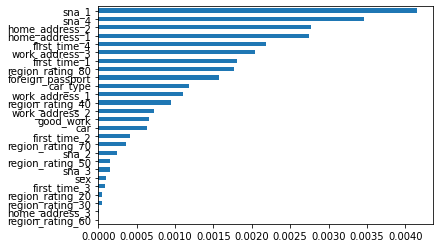

In [22]:
#  и оценим значимость категориальных переменных

from sklearn.feature_selection import mutual_info_classif

imp_cat = pd.Series(mutual_info_classif(data[bin_cols + col_names], data['default'],
                                     discrete_features =True), index = bin_cols + col_names)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

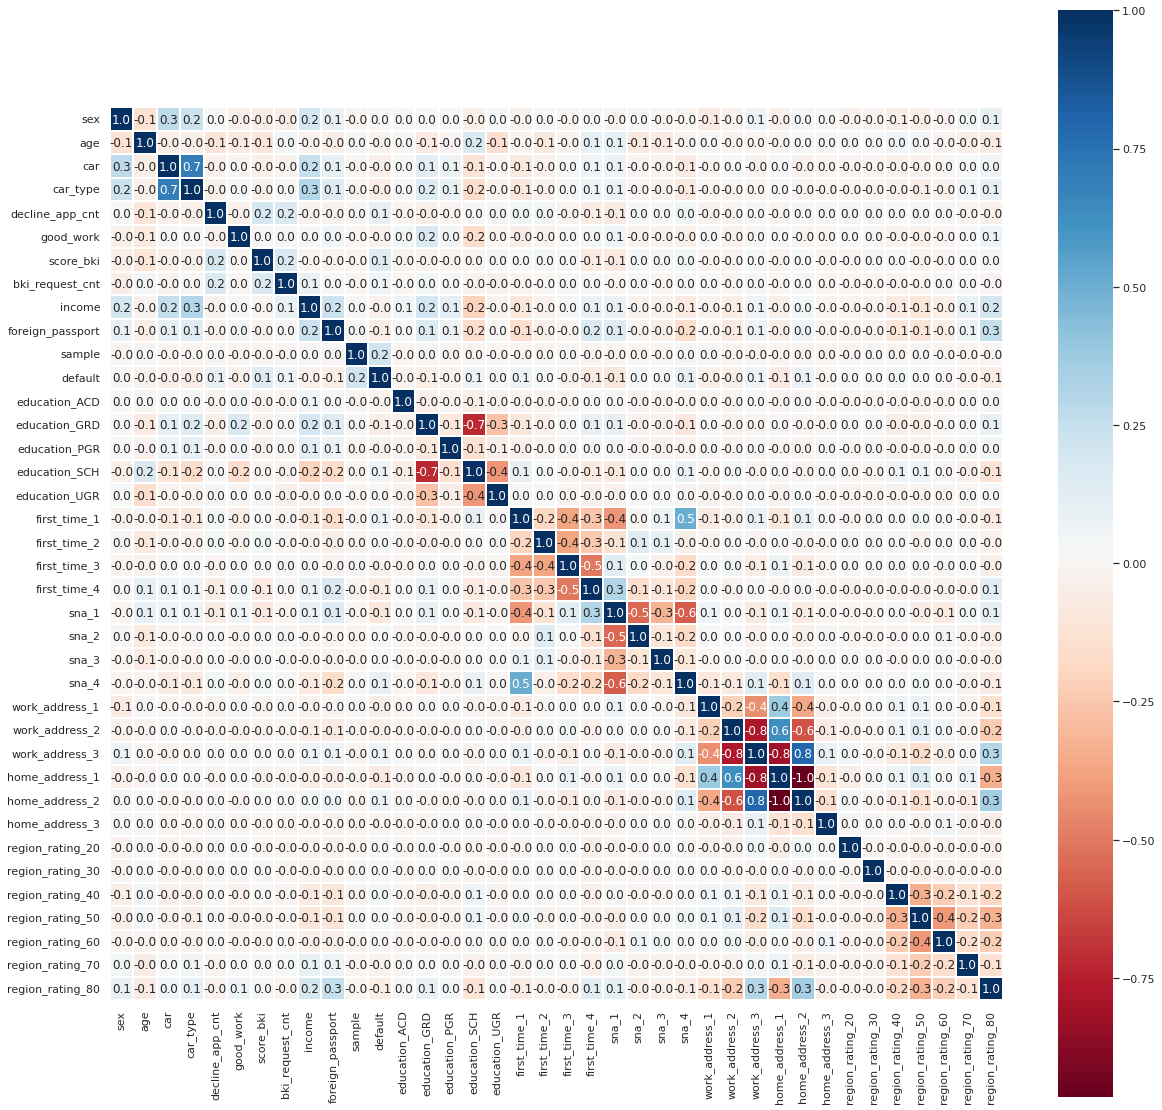

In [23]:
#  посмотрим на корреляцию признаков
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

<AxesSubplot:>

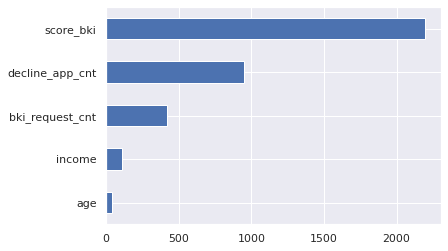

In [24]:
#  теперь посмотрим на численные признаки
#  для начала оценим их значимость:

from sklearn.feature_selection import f_classif

imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

распределение признака age


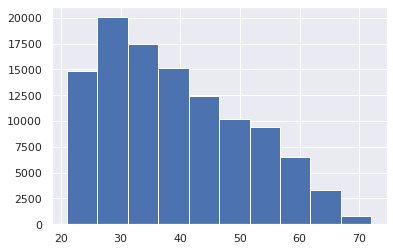

распределение признака decline_app_cnt


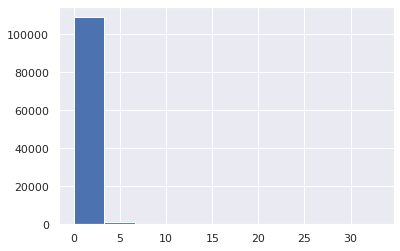

распределение признака score_bki


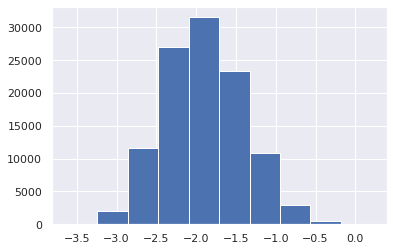

распределение признака bki_request_cnt


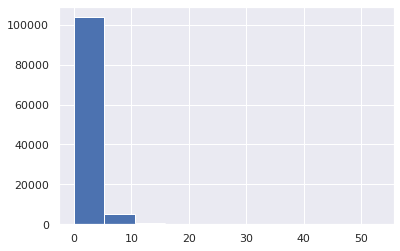

распределение признака income


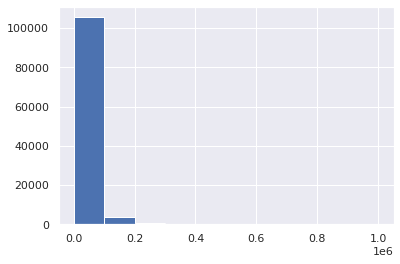

In [25]:
#  теперь посмотрим на распределение
for col in num_cols:
    print('распределение признака', col)
    plt.hist(data[col])
    plt.show()

распределение признака age после логарифмирования


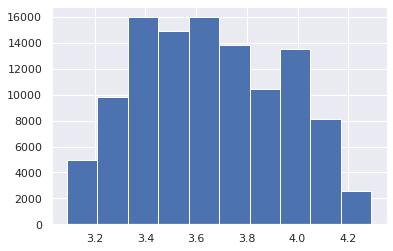

распределение признака decline_app_cnt после логарифмирования


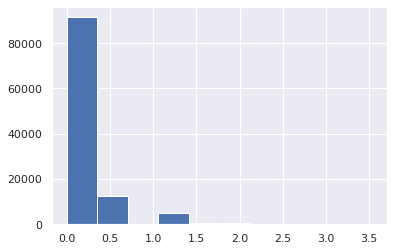

распределение признака score_bki после логарифмирования


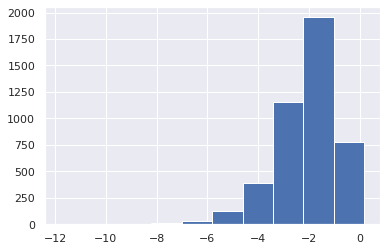

распределение признака bki_request_cnt после логарифмирования


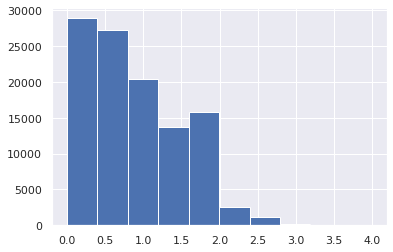

распределение признака income после логарифмирования


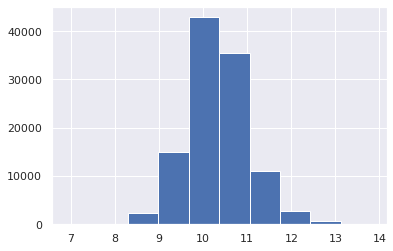

In [26]:
#  Явно не ноомально распределены признаки age, decline_app_cnt, bki_request_cnt и
#  income. Применим логарифмирование для сглаживания

for col in num_cols:
    data[col] = data[col].apply(lambda w: np.log(w + 1))
    print('распределение признака', col, 'после логарифмирования')
    plt.hist(data[col])
    plt.show()

In [27]:
#  Не везде помогло. Но всё равно попробуем применить стандартизацию
from sklearn.preprocessing import StandardScaler

for col in num_cols:
    data[col] = StandardScaler().fit_transform(data[num_cols].values)

#  и посмотрим, что получилось
data.head()

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,home_address_1,home_address_2,home_address_3,region_rating_20,region_rating_30,region_rating_40,region_rating_50,region_rating_60,region_rating_70,region_rating_80
0,1,-0.888776,1,1,-0.888776,0,-0.888776,-0.888776,-0.888776,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0.120447,0,0,0.120447,0,0.120447,0.120447,0.120447,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0.972731,1,1,0.972731,0,0.972731,0.972731,0.972731,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1.362924,0,0,1.362924,0,1.362924,1.362924,1.362924,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.031629,0,0,0.031629,0,0.031629,0.031629,0.031629,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               110148 non-null  int64  
 1   age               110148 non-null  float64
 2   car               110148 non-null  int64  
 3   car_type          110148 non-null  int64  
 4   decline_app_cnt   110148 non-null  float64
 5   good_work         110148 non-null  int64  
 6   score_bki         110148 non-null  float64
 7   bki_request_cnt   110148 non-null  float64
 8   income            110148 non-null  float64
 9   foreign_passport  110148 non-null  int64  
 10  sample            110148 non-null  int64  
 11  default           110148 non-null  int64  
 12  education_ACD     110148 non-null  uint8  
 13  education_GRD     110148 non-null  uint8  
 14  education_PGR     110148 non-null  uint8  
 15  education_SCH     110148 non-null  uint8  
 16  education_UGR     11

In [29]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample', 'default'], axis=1)

y = train_data['default'].values  # наш таргет
X = train_data.drop(['default'], axis=1)

In [30]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
from sklearn.model_selection import train_test_split

# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
test_data.columns

Index(['sex', 'age', 'car', 'car_type', 'decline_app_cnt', 'good_work',
       'score_bki', 'bki_request_cnt', 'income', 'foreign_passport',
       'education_ACD', 'education_GRD', 'education_PGR', 'education_SCH',
       'education_UGR', 'first_time_1', 'first_time_2', 'first_time_3',
       'first_time_4', 'sna_1', 'sna_2', 'sna_3', 'sna_4', 'work_address_1',
       'work_address_2', 'work_address_3', 'home_address_1', 'home_address_2',
       'home_address_3', 'region_rating_20', 'region_rating_30',
       'region_rating_40', 'region_rating_50', 'region_rating_60',
       'region_rating_70', 'region_rating_80'],
      dtype='object')

In [32]:
X_train.columns

Index(['sex', 'age', 'car', 'car_type', 'decline_app_cnt', 'good_work',
       'score_bki', 'bki_request_cnt', 'income', 'foreign_passport',
       'education_ACD', 'education_GRD', 'education_PGR', 'education_SCH',
       'education_UGR', 'first_time_1', 'first_time_2', 'first_time_3',
       'first_time_4', 'sna_1', 'sna_2', 'sna_3', 'sna_4', 'work_address_1',
       'work_address_2', 'work_address_3', 'home_address_1', 'home_address_2',
       'home_address_3', 'region_rating_20', 'region_rating_30',
       'region_rating_40', 'region_rating_50', 'region_rating_60',
       'region_rating_70', 'region_rating_80'],
      dtype='object')

In [33]:
X_test.columns

Index(['sex', 'age', 'car', 'car_type', 'decline_app_cnt', 'good_work',
       'score_bki', 'bki_request_cnt', 'income', 'foreign_passport',
       'education_ACD', 'education_GRD', 'education_PGR', 'education_SCH',
       'education_UGR', 'first_time_1', 'first_time_2', 'first_time_3',
       'first_time_4', 'sna_1', 'sna_2', 'sna_3', 'sna_4', 'work_address_1',
       'work_address_2', 'work_address_3', 'home_address_1', 'home_address_2',
       'home_address_3', 'region_rating_20', 'region_rating_30',
       'region_rating_40', 'region_rating_50', 'region_rating_60',
       'region_rating_70', 'region_rating_80'],
      dtype='object')

In [34]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((36349, 36), (73799, 37), (73799, 36), (59039, 36), (14760, 36))

In [35]:
# Импортируем необходимые библиотеки:
from sklearn.linear_model import LogisticRegression # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [36]:
logreg = LogisticRegression(solver='sag', max_iter=50, tol=0.001, 
                            class_weight='balanced', penalty='l2')

In [37]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

In [38]:
predict_submission = logreg.predict(test_data)

In [39]:
sample_submission['default'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,client_id,default
0,74835,0
1,17527,1
2,75683,0
3,26883,1
4,28862,0
5,99881,1
6,26630,1
7,79934,0
8,16605,0
9,105449,0


In [40]:
!kaggle competitions submit -c sf-scoring -f ssubmission.csv -m "Message"
# !kaggle competitions submit your-competition-name -f submission.csv -m 'My submission message'

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
